### Importar Biblotecas e Bases de Dados.

 1. Entendimento do Desafio que você quer resolver
 2. Entendimento da Empresa/Área
 3. Extração/Obtenção de Dados
 4. Ajustes de Dados (Limpeza de Dados)
 5. Análise Exploratória
 6. Modelagem + Algoritmos
 7. Interpretação dos Resultados
 8. Deploy/Produção

# Importar Biblotecas e Bases de Dados.

In [2]:
import pandas as pd
import pathlib as pl
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [3]:
meses = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}

caminho_bases = pl.Path('dataset')

dfs = []
for arquivo in caminho_bases.iterdir():
    nome_mes = arquivo.name[:3]
    if nome_mes not in meses:
        continue  # pula arquivos fora do padrão
    mes = meses[nome_mes]

    ano = arquivo.name[-8:]
    ano = int(ano.replace('.csv',''))

    df = pd.read_csv(caminho_bases / arquivo.name)
    df['ano'] = ano
    df['mes'] = mes
    dfs.append(df)

base_airbnb = pd.concat(dfs, ignore_index=True)

C:\Users\Rafael\AppData\Local\Temp\ipykernel_7672\2883454214.py:15: DtypeWarning: Columns (62,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\Rafael\AppData\Local\Temp\ipykernel_7672\2883454214.py:15: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\Rafael\AppData\Local\Temp\ipykernel_7672\2883454214.py:15: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\Rafael\AppData\Local\Temp\ipykernel_7672\2883454214.py:15: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\Rafael\AppData\Local\Temp\ipykernel_7672\2883454214.py:15: DtypeWarning: Columns (61,62,94) have mixed t

- Como temos muitas colunas, nosso modelo pode acabar ficando muito lento.
- Além disso, uma análise rapida permite ver que várias colnas não são necessárias para o nosso modelo de previsão, por isso, vamos excluir algumas colunas da nossa base.
- Tipo de colunas que vamos exlcluir:
    1. IDs, Links e informações não relevantes para o modelo
    2. Colunas repetidas ou extremamente parecdas com outra(que dão a mesma informação para o modelo. Ex: Data x Ano/Mês)
    3. Colunas preenchidas com texto livre -> Nâo rodaremos nenhuma análise de palavras ou algo do tipo
    4. colunas em que todos ou quase todos valores são iguais

- Para isso, vou criar um arquivo em excel com os 1.000 primeiros registros e fazer uma análise qualitativa.

In [4]:
colunas = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes']

base_airbnb = base_airbnb.loc[:, colunas]
display(base_airbnb)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes
0,NaN,NaN,f,1.0,-22.946854,-43.182737,Apartment,Entire home/apt,4,1.0,...,9.0,9.0,9.0,9.0,9.0,f,f,strict_14_with_grace_period,2018,4
1,within an hour,100%,t,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,...,9.0,10.0,10.0,9.0,9.0,t,f,strict,2018,4
2,within an hour,100%,f,1.0,-22.985698,-43.201935,Apartment,Entire home/apt,2,1.0,...,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
3,within an hour,100%,f,3.0,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
4,within an hour,100%,t,1.0,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,9.0,t,f,strict,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902205,within an hour,93%,f,0.0,-23.003180,-43.342840,Apartment,Entire home/apt,4,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,9
902206,NaN,NaN,f,0.0,-22.966640,-43.393450,Apartment,Entire home/apt,4,2.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,9
902207,within a few hours,74%,f,32.0,-22.962080,-43.175520,Apartment,Entire home/apt,5,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2019,9
902208,NaN,NaN,f,0.0,-23.003400,-43.341820,Apartment,Entire home/apt,4,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2019,9


# Tratar Valores Faltando

- Visualizando os dados, percebemos que existe uma grande disparidade em dados faltantes. As colunas com mais de 300.000 valores NaN foram excluídas da análise.
- Para as outras colunas, como temos muitos dados (mais de 900.00 linhas) vamos excluir as linhas que contém dados NaN.

In [5]:
#print(base_airbnb.isnull().sum())

for coluna in base_airbnb:
    if base_airbnb[coluna].isnull().sum() > 30000:
        base_airbnb = base_airbnb.drop(coluna, axis=1)

base_airbnb = base_airbnb.dropna()

print(base_airbnb.isnull().sum())
print(base_airbnb.shape)

host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64
(897709, 23)


In [6]:
print(base_airbnb.dtypes)
print('-'*60)
print(base_airbnb.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object
------------------------------------------------------------
host_is_superhost                                                           f
host_listings_count

- Como preço e extra people estão sendo reconhecido como objeto (ao invés de ser um float) temos que mudar o tipo de variável da coluna.

In [7]:
base_airbnb['price'] = base_airbnb['price'].str.replace('$', '')
base_airbnb['price'] = base_airbnb['price'].str.replace(',', '')
base_airbnb['price'] = base_airbnb['price'].astype(np.float32, copy=False)

base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace(',', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(np.float32, copy=False)

print(base_airbnb.dtypes)

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object


#  Análise Exploratória e Tratar Outliers
     1. Ver a correlação entre as features e decidir se manteremos todas as deaturs que temos.
     2. Excluir otliers (usaremos como regra, valores abaixo de Q1 - 1.5 * Aplitude e valores acima de Q3 + 1,5 * Amplitude). Amplitude = Q3 - Q1.
     3. Confirmar se todas as features que temos fazem realmente sentido para o nosso modelo ou se alguma delas não vai nos ajudar e se devemos excluir.

<Axes: >

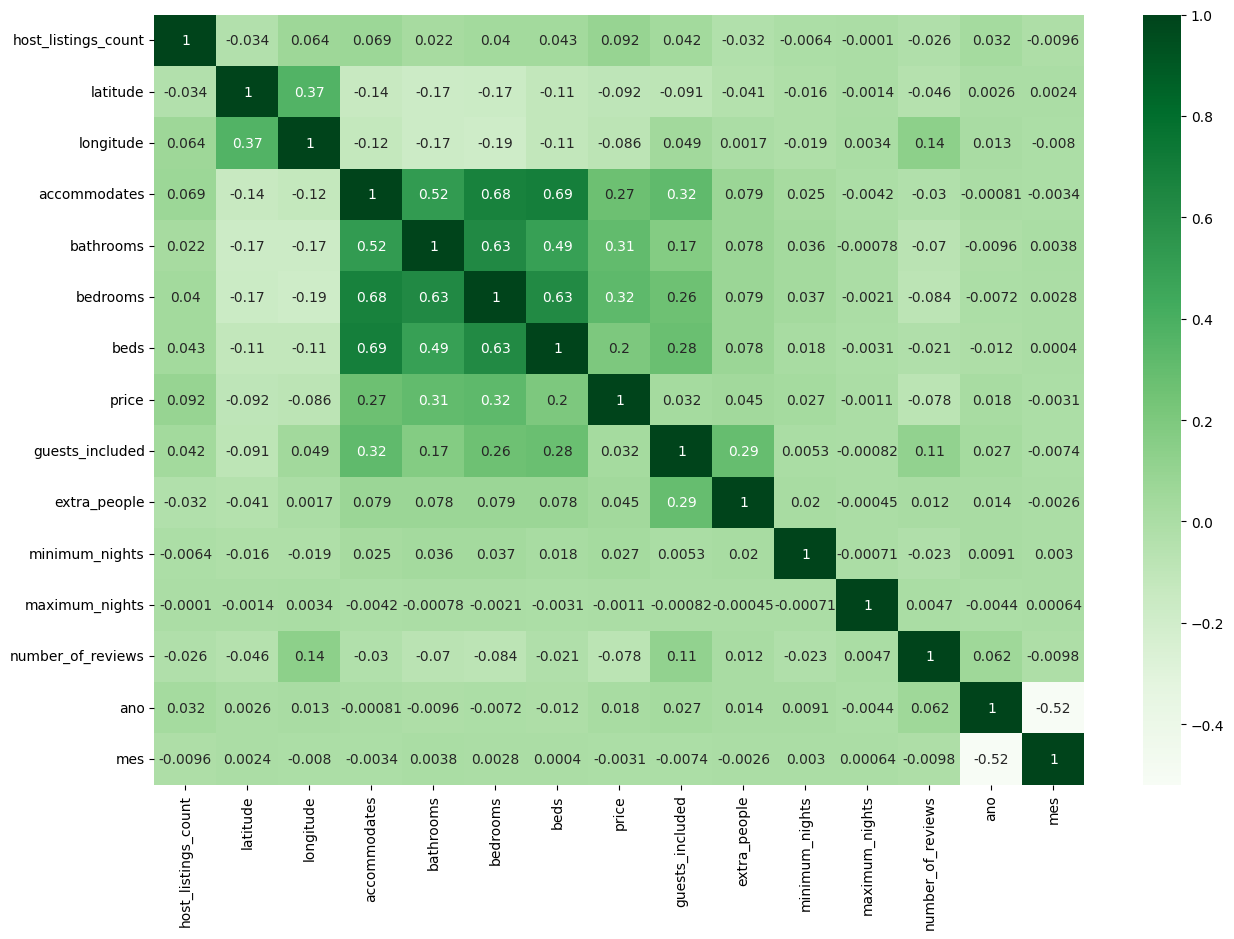

In [8]:
plt.figure(figsize=(15, 10))
sns.heatmap(base_airbnb.select_dtypes(include='number').corr(), annot=True, cmap='Greens')

## Definição de Funções para Análise de Outliers

Vamos definir algumas funções para ajudar na análise de outliers das colunas

In [9]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) 
                & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df, linhas_removidas

def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)

def histograma(coluna):
    plt.figure(figsize=(15, 5))
    sns.histplot(data=base_airbnb, x=coluna, element='bars')

def grafico_barra(coluna):
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    ax.set_xlim(limites(coluna))

#### price

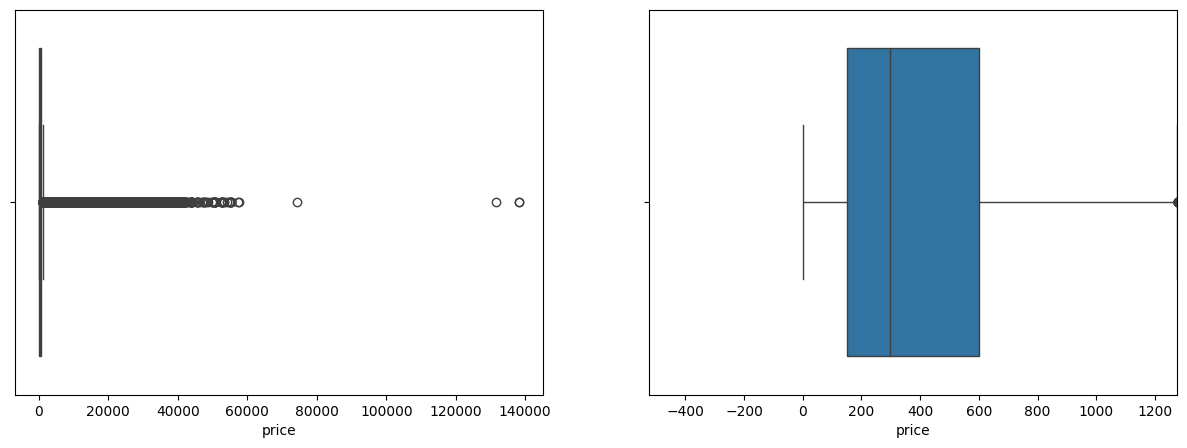

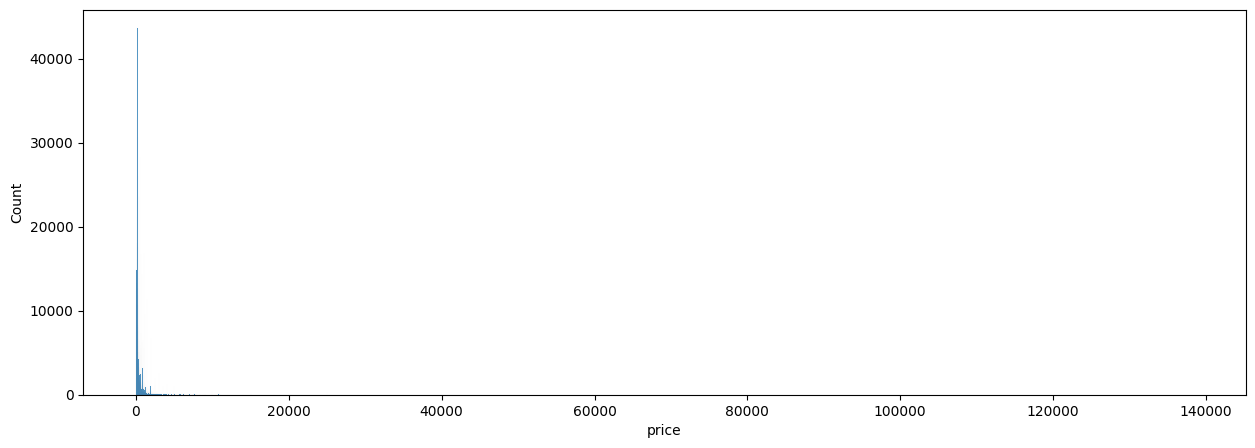

In [10]:
diagrama_caixa(base_airbnb['price'])
histograma(base_airbnb['price'])

como estamos contruindo um modelo para imóveis comuns, acredito que os valores acima do limite superior serão apenas de apartamentos de altíssimo luxo, que não é o nosso objetivo principal. Por isso, pdemos excluir esses outliers

87282 linhas removidas na coluna de price


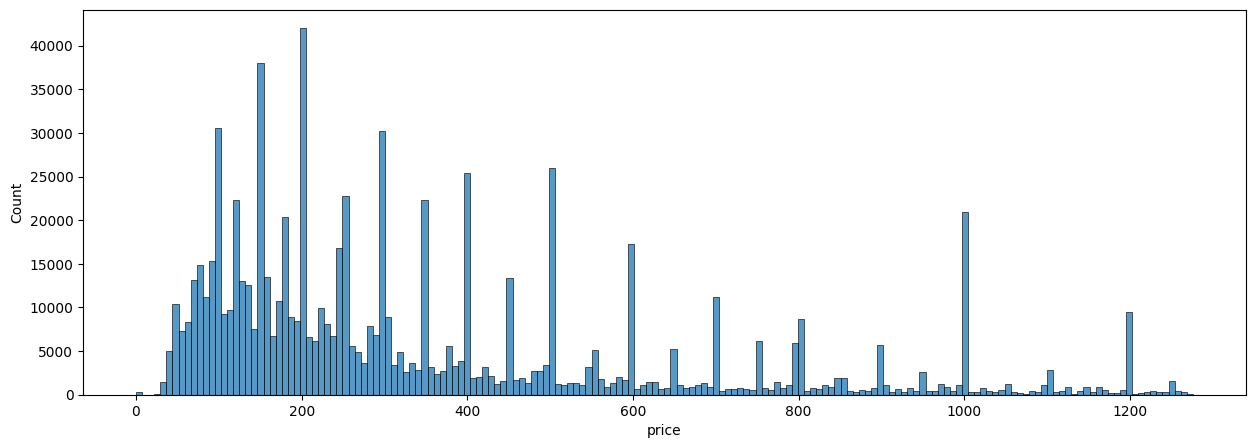

In [11]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'price')
print('{} linhas removidas na coluna de price'.format(linhas_removidas))

histograma(base_airbnb['price'])

#### extra_people

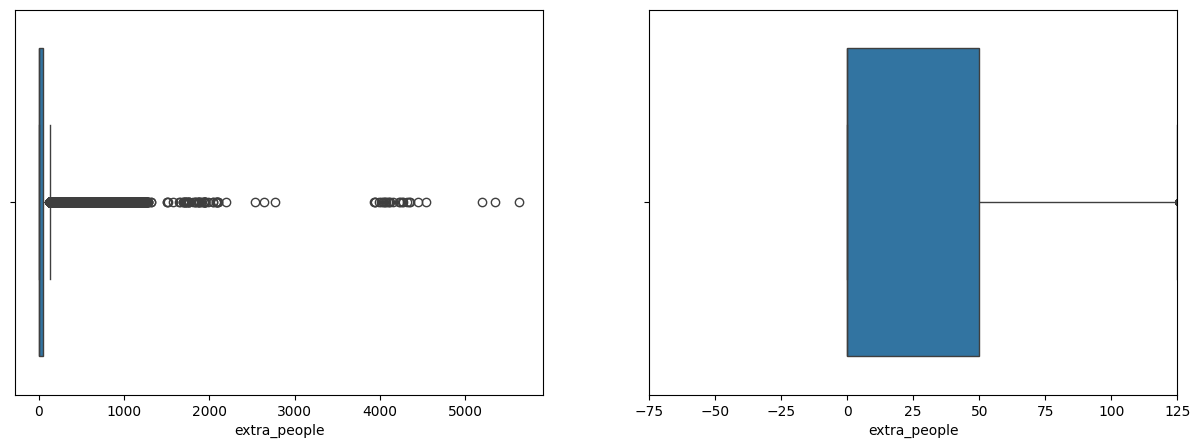

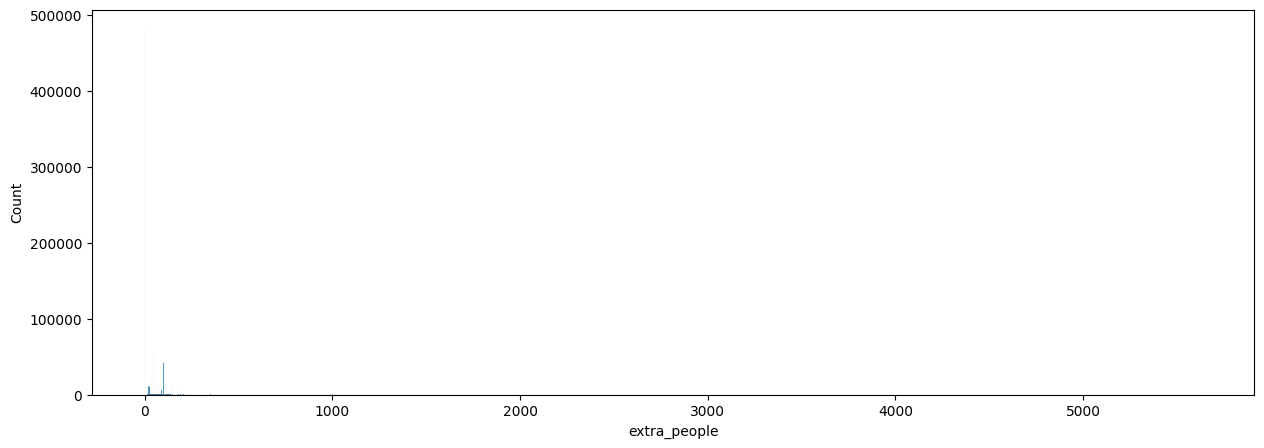

In [12]:
diagrama_caixa(base_airbnb['extra_people'])
histograma(base_airbnb['extra_people'])

59194 linhas removidas na coluna de extra_people


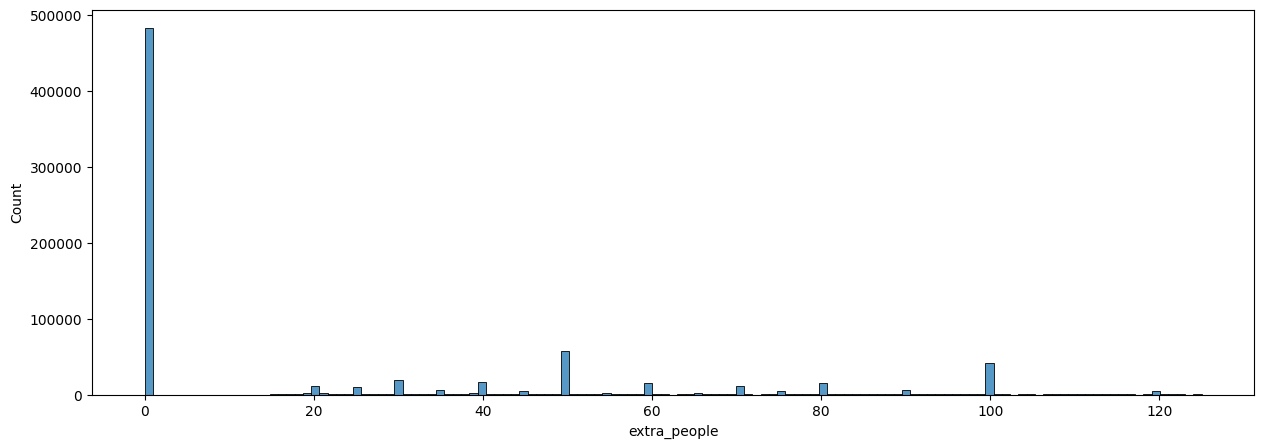

In [13]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'extra_people')
print('{} linhas removidas na coluna de extra_people'.format(linhas_removidas))

histograma(base_airbnb['extra_people'])

### host_listings_count

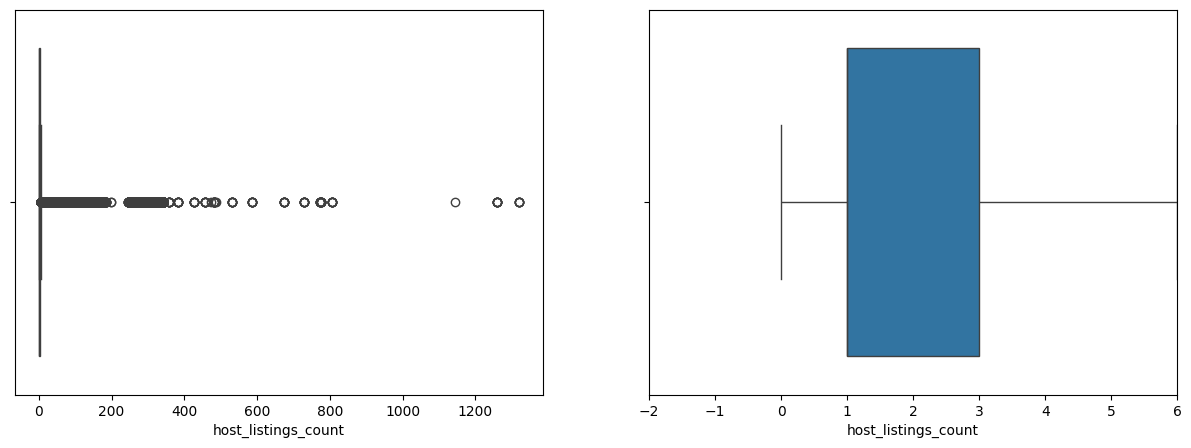

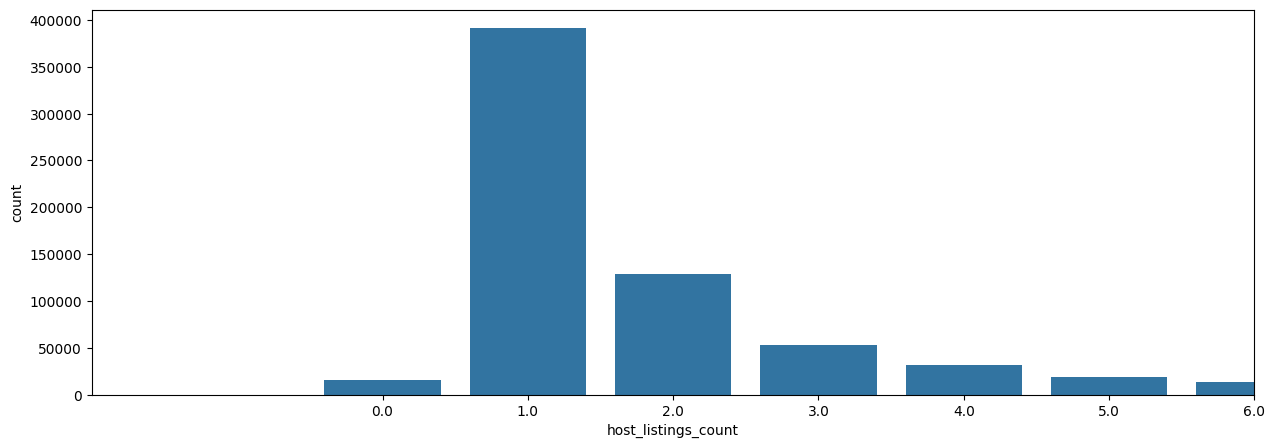

In [14]:
diagrama_caixa(base_airbnb['host_listings_count'])
grafico_barra(base_airbnb['host_listings_count'])

Podemos excluir os outliers, porque para o objetivo do nosso projeto hosts com mais de 6 imóveis no airbnb não é o público alvo do objetivo do projeto(imagino que seja imobiliários ou profissionais que gerenciam imóveis no airbnb)

97723 linhas removidas na coluna de host_listings_count


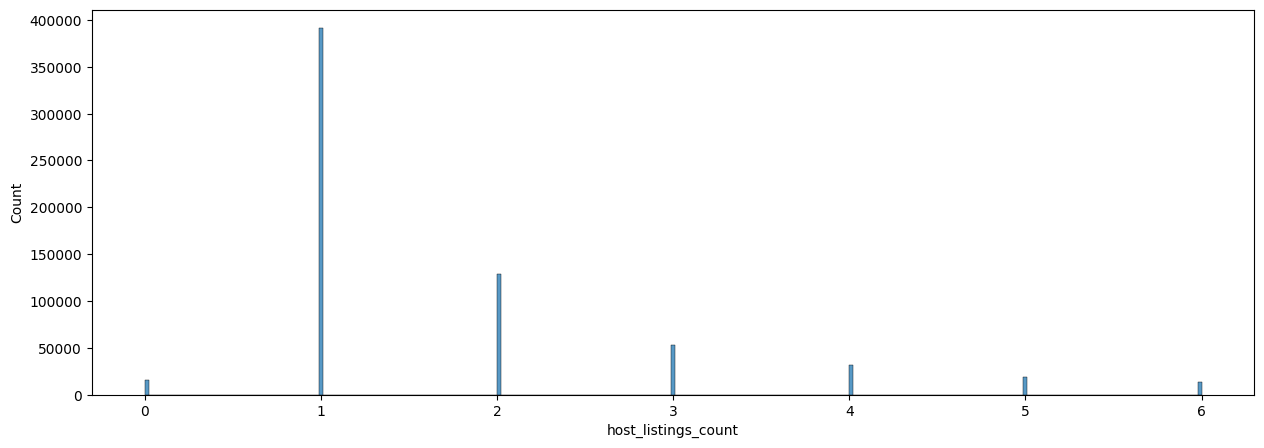

In [15]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'host_listings_count')
print('{} linhas removidas na coluna de host_listings_count'.format(linhas_removidas))

histograma(base_airbnb['host_listings_count'])

### accommodates

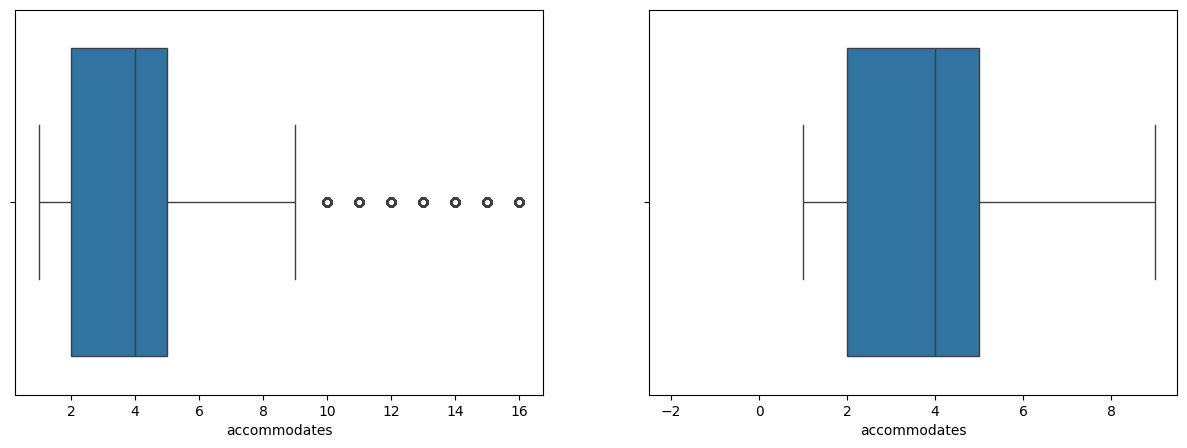

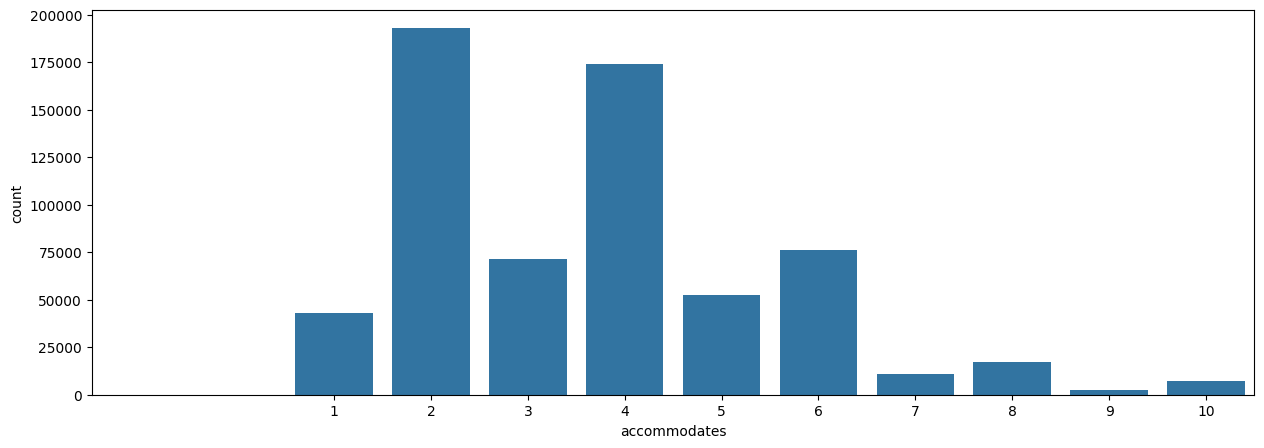

In [16]:
diagrama_caixa(base_airbnb['accommodates'])
grafico_barra(base_airbnb['accommodates'])

13146 linhas removidas na coluna de accommodates


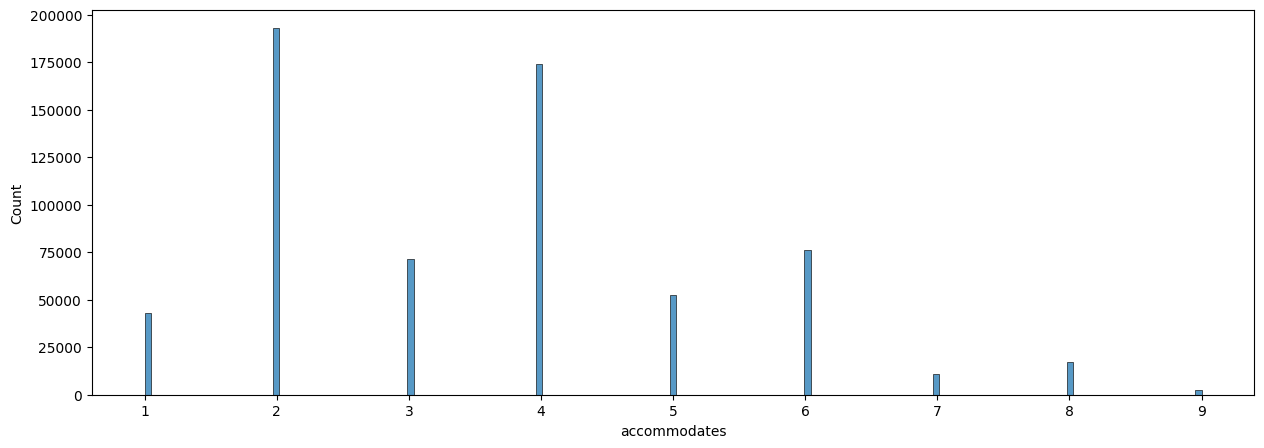

In [17]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'accommodates')
print('{} linhas removidas na coluna de accommodates'.format(linhas_removidas))

histograma(base_airbnb['accommodates'])

### bathrooms

<Axes: xlabel='bathrooms', ylabel='count'>

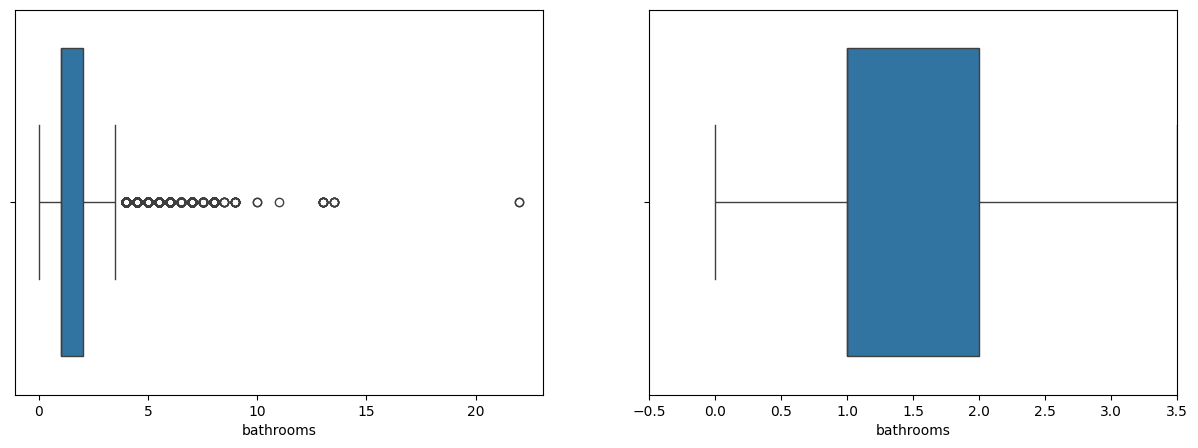

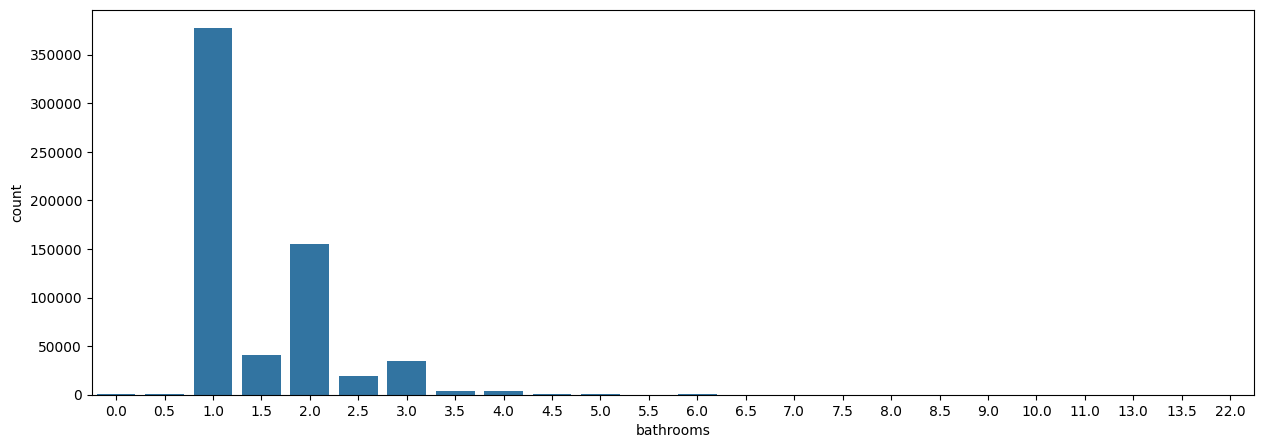

In [18]:
diagrama_caixa(base_airbnb['bathrooms'])
plt.figure(figsize=(15, 5))
sns.barplot(x=base_airbnb['bathrooms'].value_counts().index, y=base_airbnb['bathrooms'].value_counts())

6894 linhas removidas na coluna de bathrooms


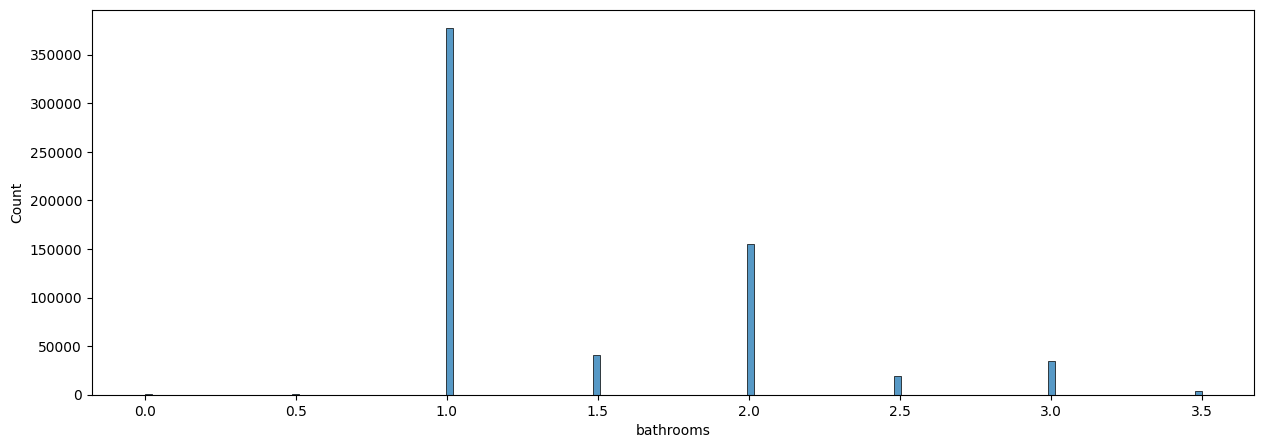

In [19]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'bathrooms')
print('{} linhas removidas na coluna de bathrooms'.format(linhas_removidas))

histograma(base_airbnb['bathrooms'])

### bedrooms

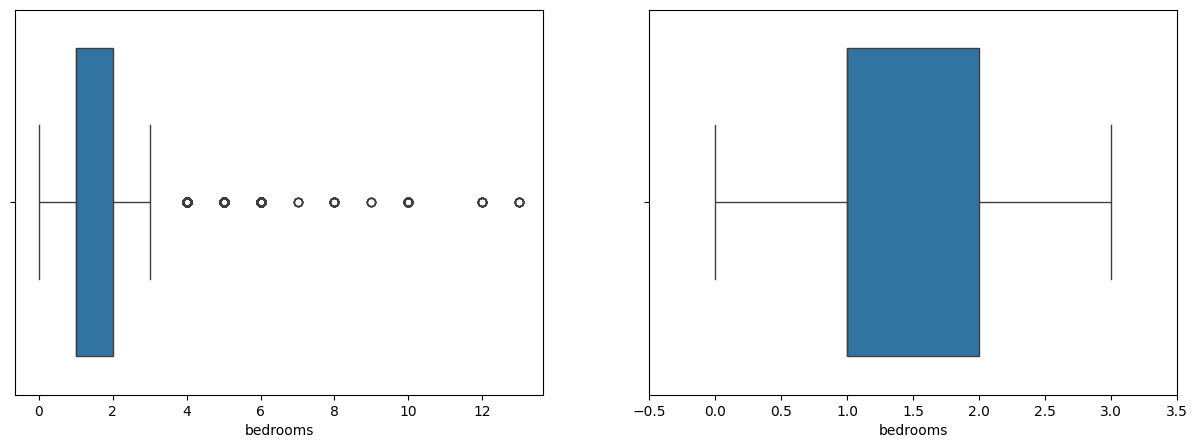

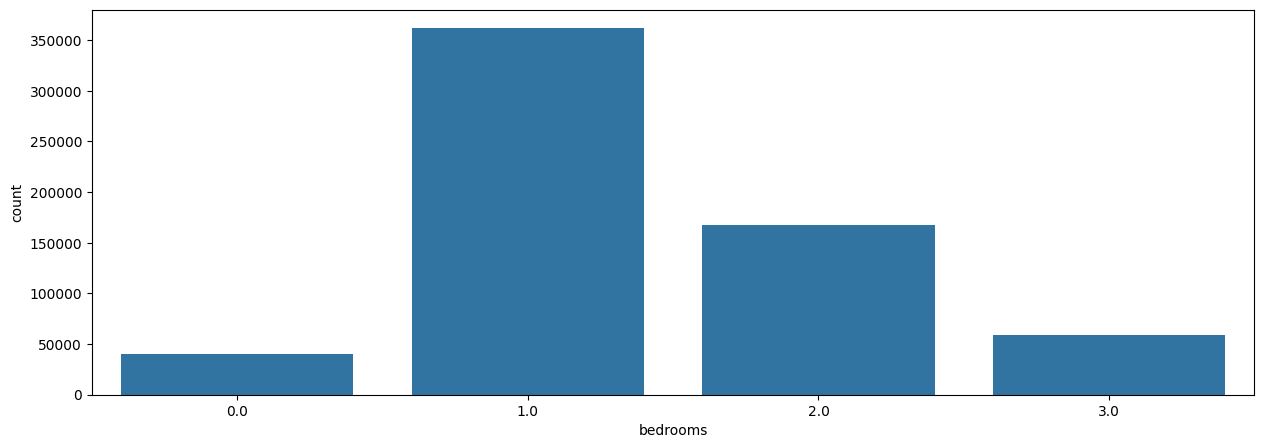

In [20]:
diagrama_caixa(base_airbnb['bedrooms'])
grafico_barra(base_airbnb['bedrooms'])

5482 linhas removidas na coluna de bedrooms


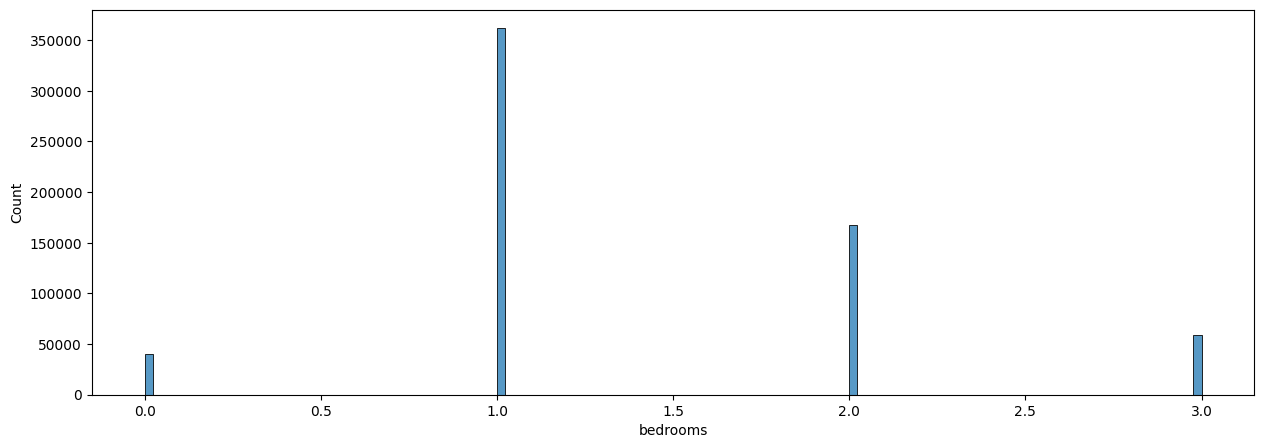

In [21]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'bedrooms')
print('{} linhas removidas na coluna de bedrooms'.format(linhas_removidas))

histograma(base_airbnb['bedrooms'])

### beds

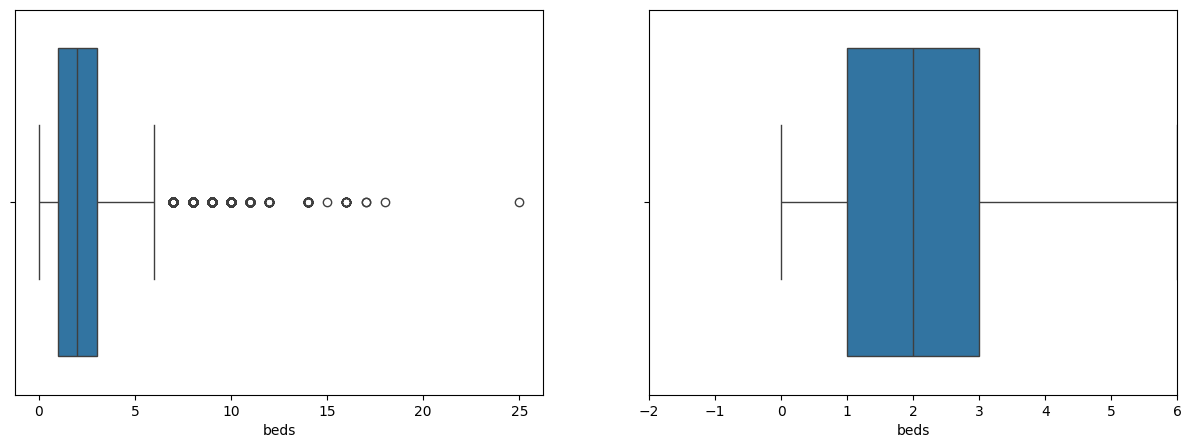

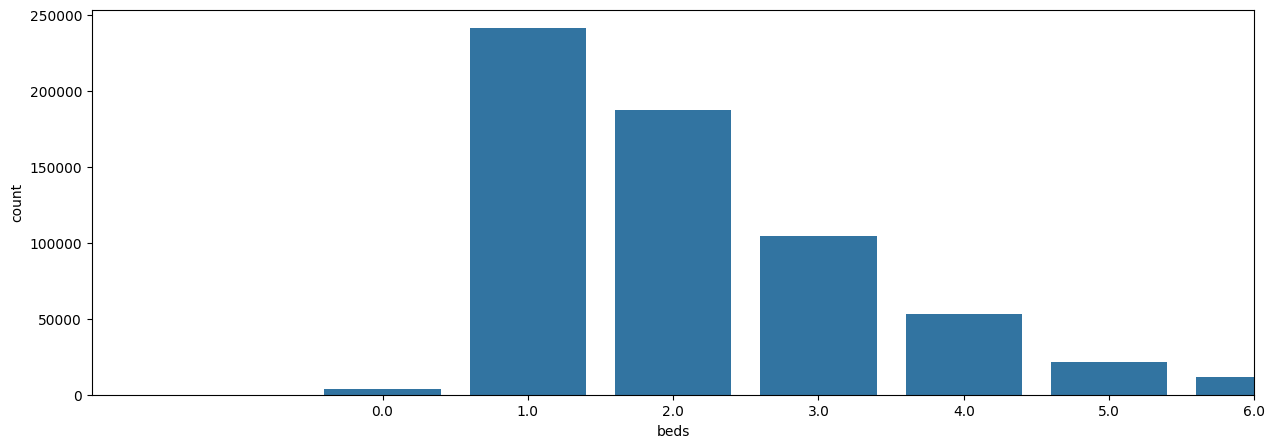

In [22]:
diagrama_caixa(base_airbnb['beds'])
grafico_barra(base_airbnb['beds'])

5622 linhas removidas na coluna de beds


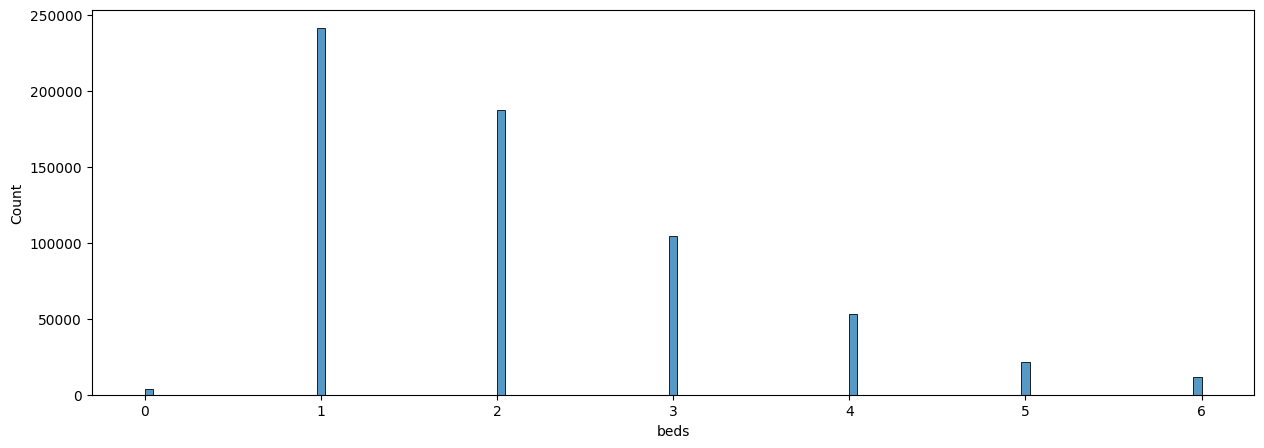

In [23]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'beds')
print('{} linhas removidas na coluna de beds'.format(linhas_removidas))

histograma(base_airbnb['beds'])

### guests_included

(np.float64(1.0), np.float64(1.0))


<Axes: xlabel='bathrooms', ylabel='count'>

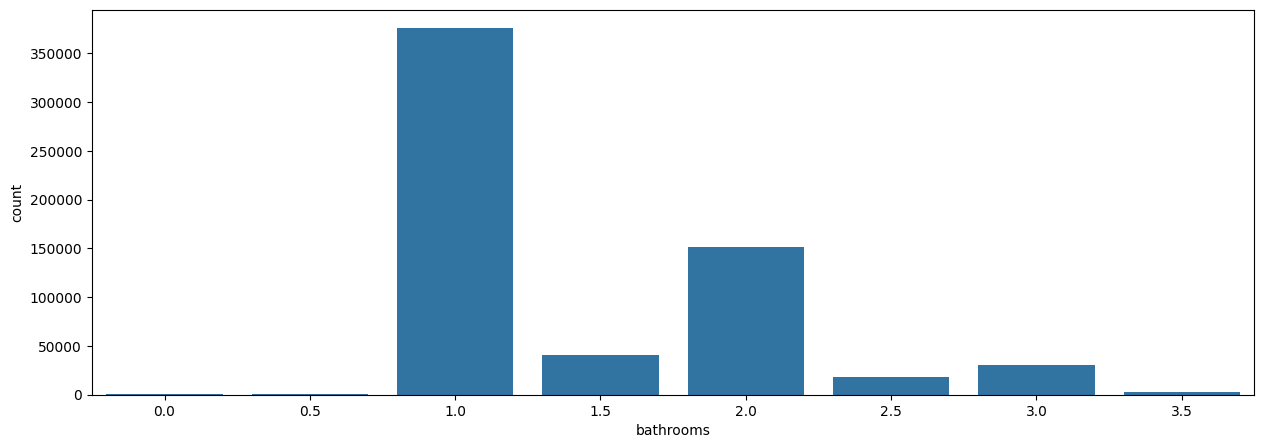

In [24]:
#diagrama_caixa(base_airbnb['guests_included'])
#grafico_barra(base_airbnb['guests_included'])
print(limites(base_airbnb['guests_included']))
plt.figure(figsize=(15, 5))
sns.barplot(x=base_airbnb['bathrooms'].value_counts().index, y=base_airbnb['bathrooms'].value_counts())

vamos remover essa feature da análise. Parece que os usuários do airbnb usam muito o valor padrão do airbnb como 1 guest included. Isso pode levar o nosso modelo a considerar uma feature que na verdade não é essencial para a definição do preço, por isso, me parece melhor excluir a coluna da análise>

In [25]:
base_airbnb = base_airbnb.drop("guests_included", axis=1)
base_airbnb.shape

(622366, 22)

### minimum_nights

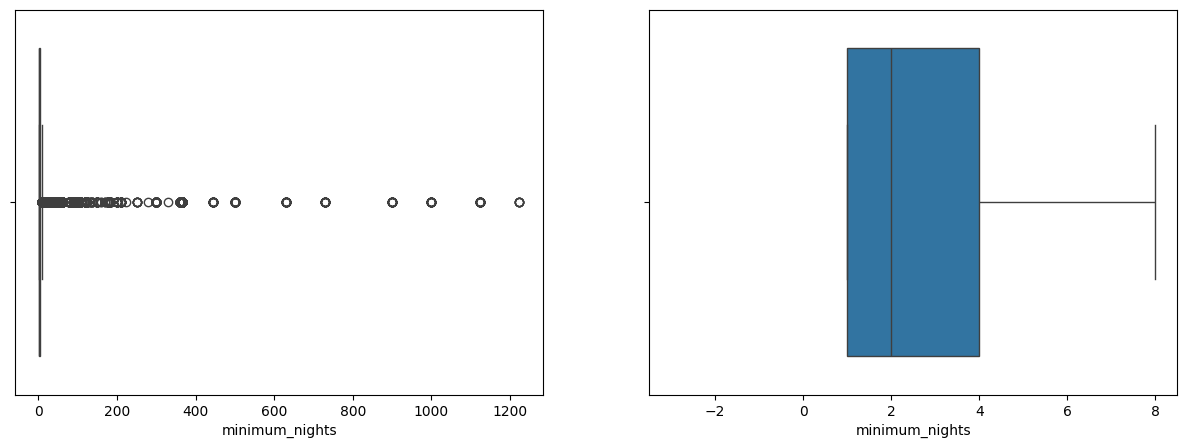

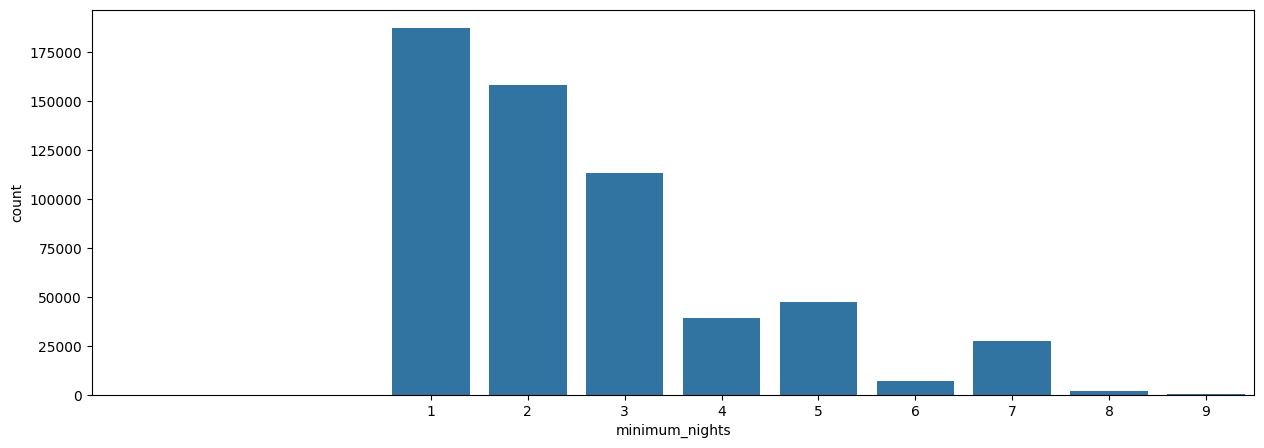

In [26]:
diagrama_caixa(base_airbnb['minimum_nights'])
grafico_barra(base_airbnb['minimum_nights'])

40383 linhas removidas na coluna de minimum_nights


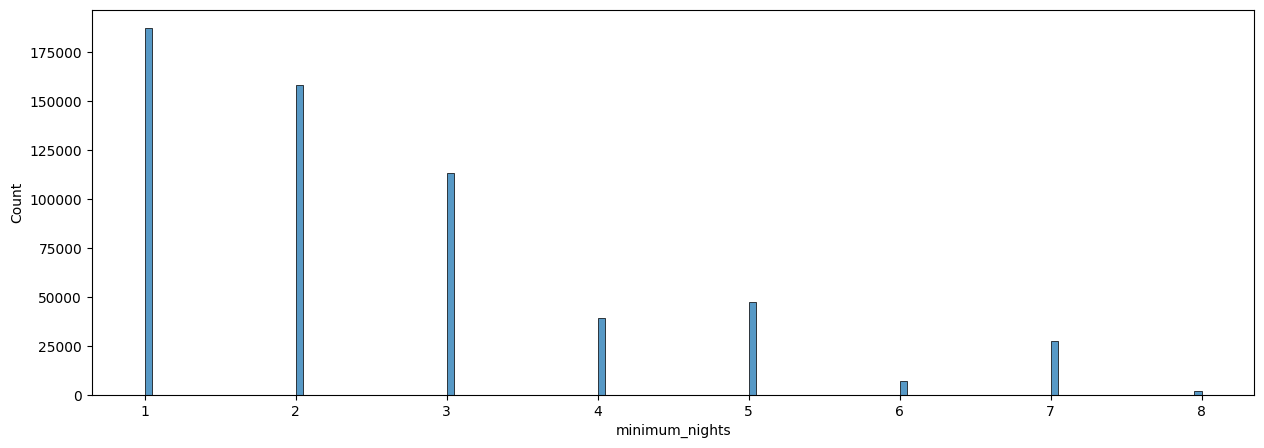

In [27]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'minimum_nights')
print('{} linhas removidas na coluna de minimum_nights'.format(linhas_removidas))

histograma(base_airbnb['minimum_nights'])

### maximum_nights

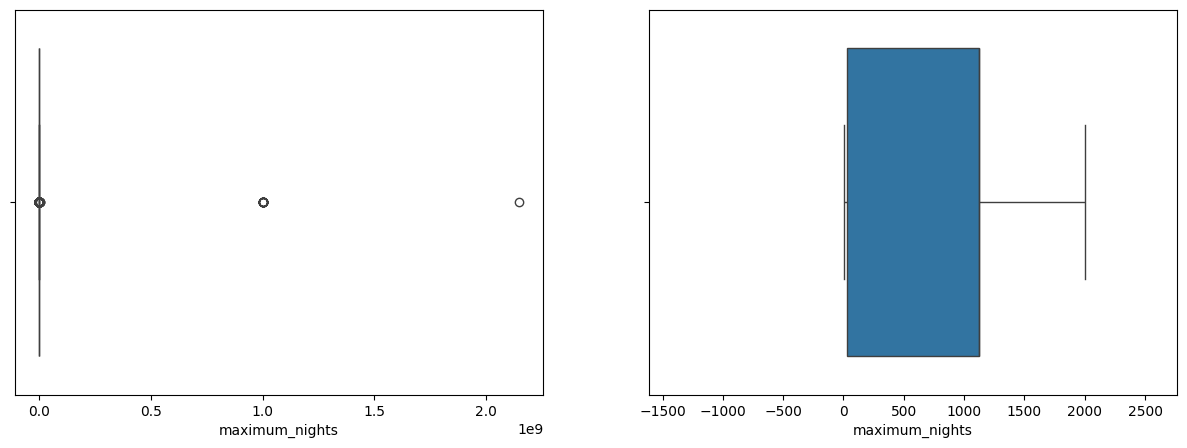

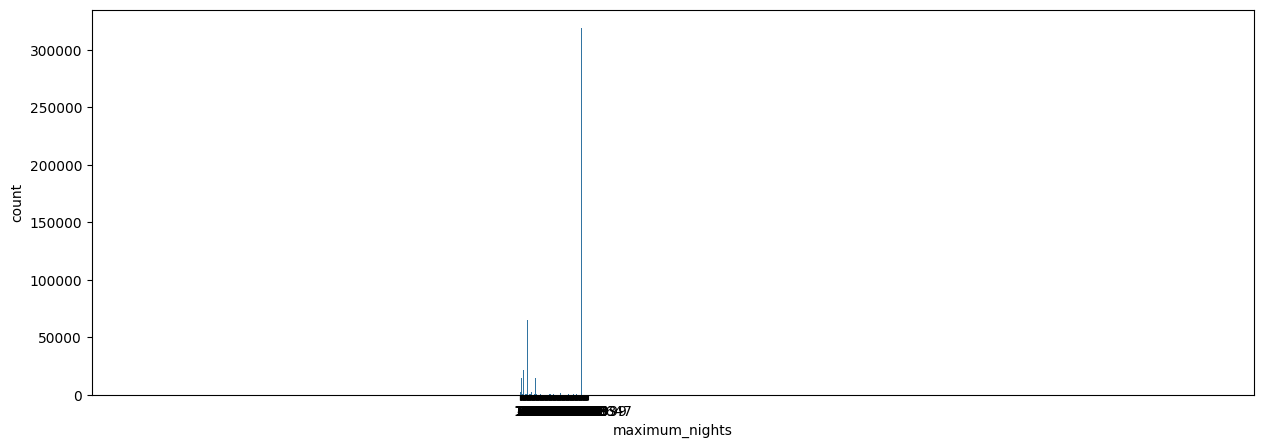

In [28]:
diagrama_caixa(base_airbnb['maximum_nights'])
grafico_barra(base_airbnb['maximum_nights'])

In [29]:
base_airbnb = base_airbnb.drop("maximum_nights", axis=1)
base_airbnb.shape

(581983, 21)

### number_of_reviews

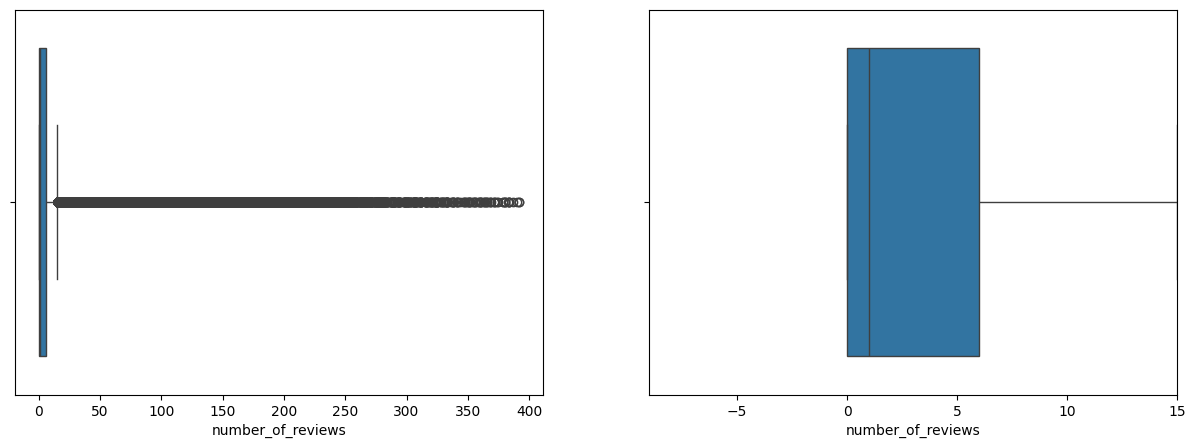

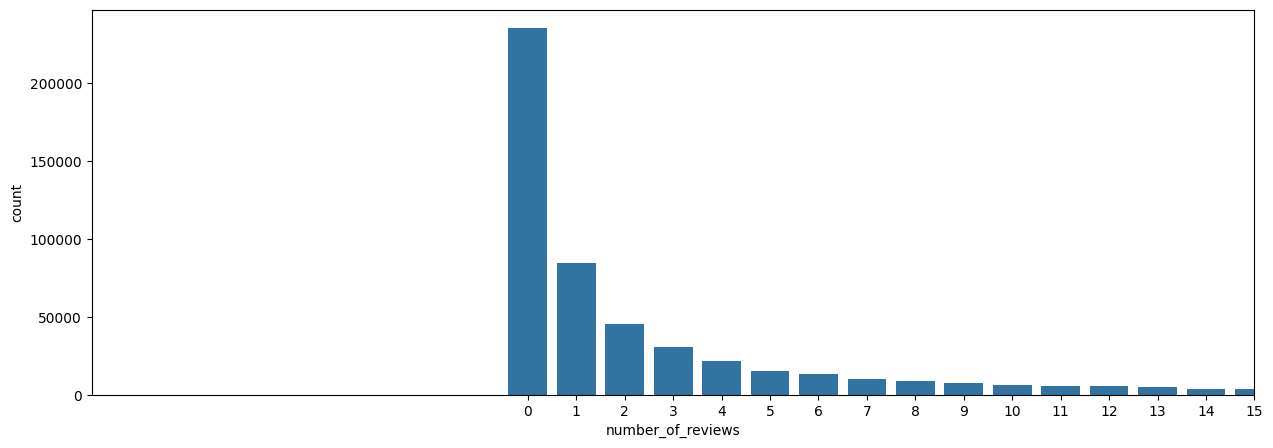

In [30]:
diagrama_caixa(base_airbnb['number_of_reviews'])
grafico_barra(base_airbnb['number_of_reviews'])

In [31]:
base_airbnb = base_airbnb.drop("number_of_reviews", axis=1)
base_airbnb.shape

(581983, 20)

### Tratamento de  Colunas de Valores de Texto

    property_type

property_type
Apartment                 458354
House                      51387
Condominium                26456
Serviced apartment         12671
Loft                       12352
Guest suite                 3621
Bed and breakfast           3472
Hostel                      2665
Guesthouse                  2155
Other                       1957
Villa                       1294
Townhouse                    969
Aparthotel                   693
Chalet                       481
Earth house                  468
Tiny house                   457
Boutique hotel               447
Hotel                        376
Casa particular (Cuba)       298
Cottage                      230
Bungalow                     207
Dorm                         185
Cabin                        141
Nature lodge                 124
Castle                        80
Treehouse                     76
Island                        54
Boat                          53
Hut                           40
Campsite                     

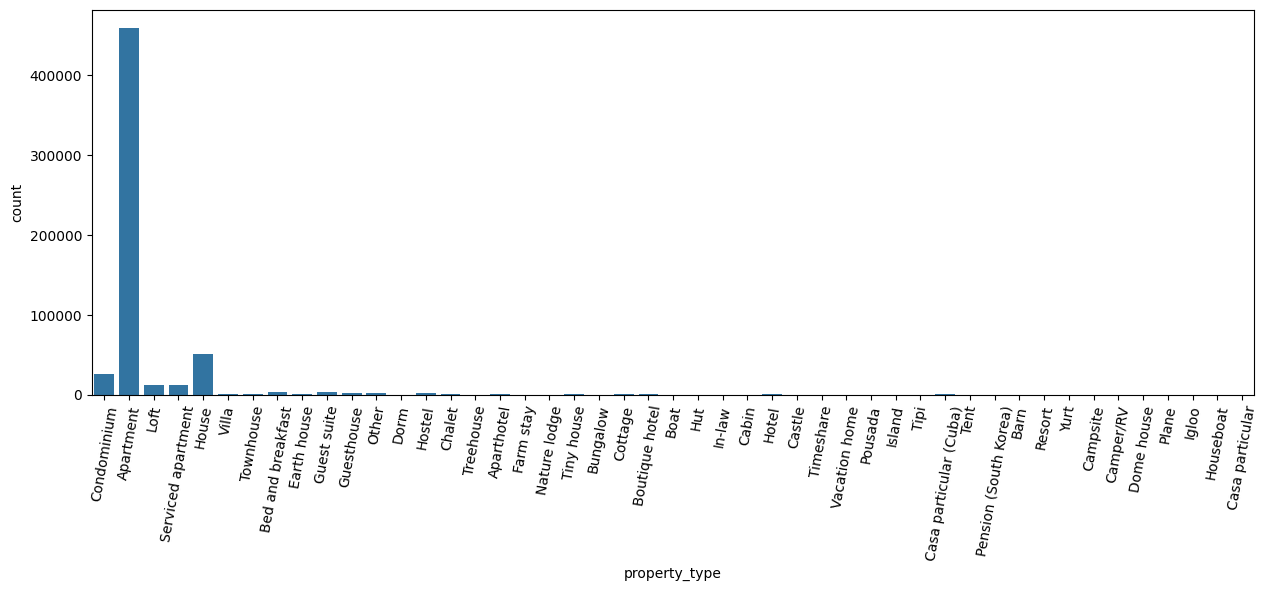

In [32]:
print(base_airbnb['property_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(data=base_airbnb, x='property_type')
grafico.tick_params(axis='x', rotation=80)

In [33]:
tabelas_tipos_cada = base_airbnb['property_type'].value_counts()
colunas_agrupar = []

for tipo in tabelas_tipos_cada.index:
    if tabelas_tipos_cada[tipo] < 2000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['property_type']==tipo, 'property_type'] = 'Outros'

print(base_airbnb['property_type'].value_counts())

['Other', 'Villa', 'Townhouse', 'Aparthotel', 'Chalet', 'Earth house', 'Tiny house', 'Boutique hotel', 'Hotel', 'Casa particular (Cuba)', 'Cottage', 'Bungalow', 'Dorm', 'Cabin', 'Nature lodge', 'Castle', 'Treehouse', 'Island', 'Boat', 'Hut', 'Campsite', 'Resort', 'Camper/RV', 'Yurt', 'Tent', 'Tipi', 'Barn', 'Farm stay', 'Pension (South Korea)', 'Dome house', 'In-law', 'Igloo', 'Vacation home', 'Timeshare', 'Pousada', 'Houseboat', 'Casa particular', 'Plane']
property_type
Apartment             458354
House                  51387
Condominium            26456
Serviced apartment     12671
Loft                   12352
Outros                  8850
Guest suite             3621
Bed and breakfast       3472
Hostel                  2665
Guesthouse              2155
Name: count, dtype: int64


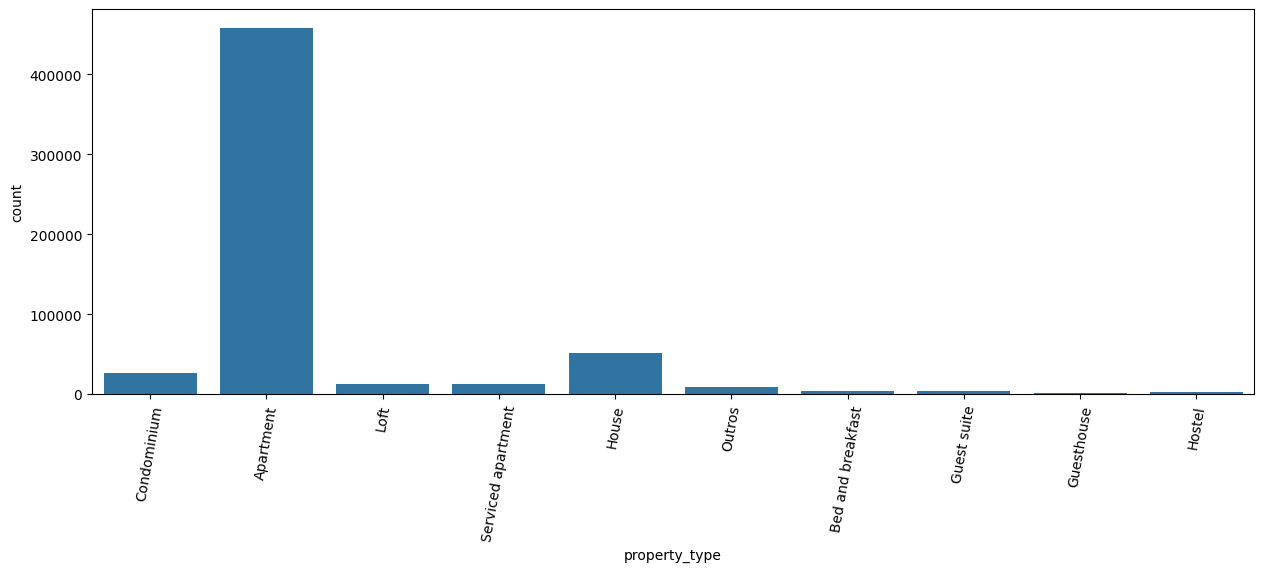

In [34]:
plt.figure(figsize=(15, 5))
grafico = sns.countplot(data=base_airbnb, x='property_type')
grafico.tick_params(axis='x', rotation=80)

### room_type

room_type
Entire home/apt    372443
Private room       196859
Shared room         11714
Hotel room            967
Name: count, dtype: int64


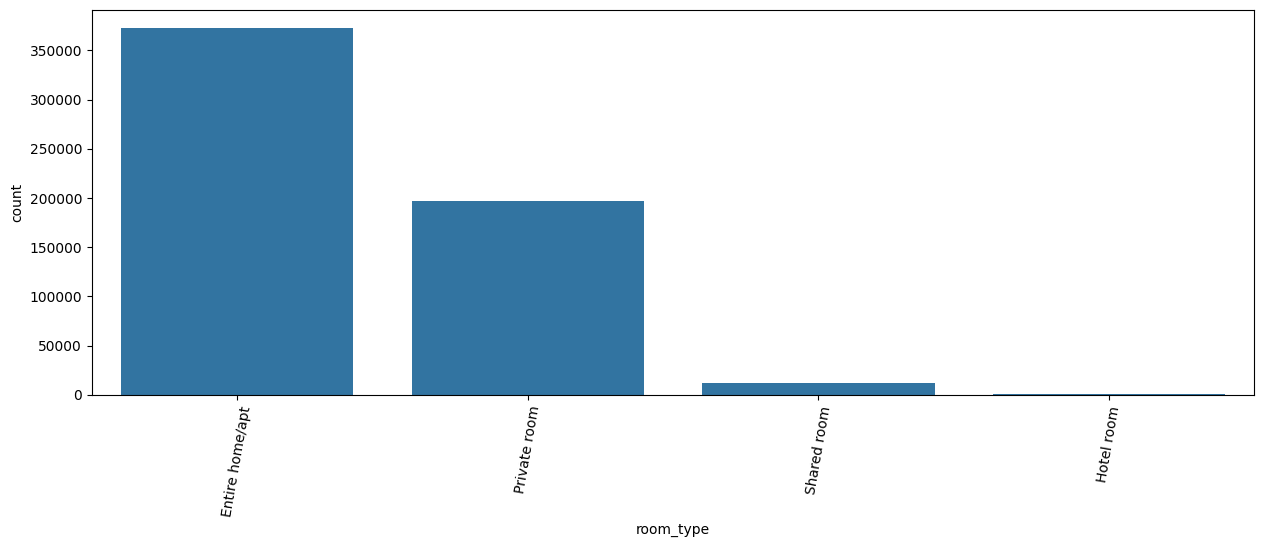

In [35]:
print(base_airbnb['room_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(data=base_airbnb, x='room_type')
grafico.tick_params(axis='x', rotation=80)

### bed_type

['Pull-out Sofa', 'Futon', 'Airbed', 'Couch']
bed_type
Real Bed    570643
Strict       11340
Name: count, dtype: int64


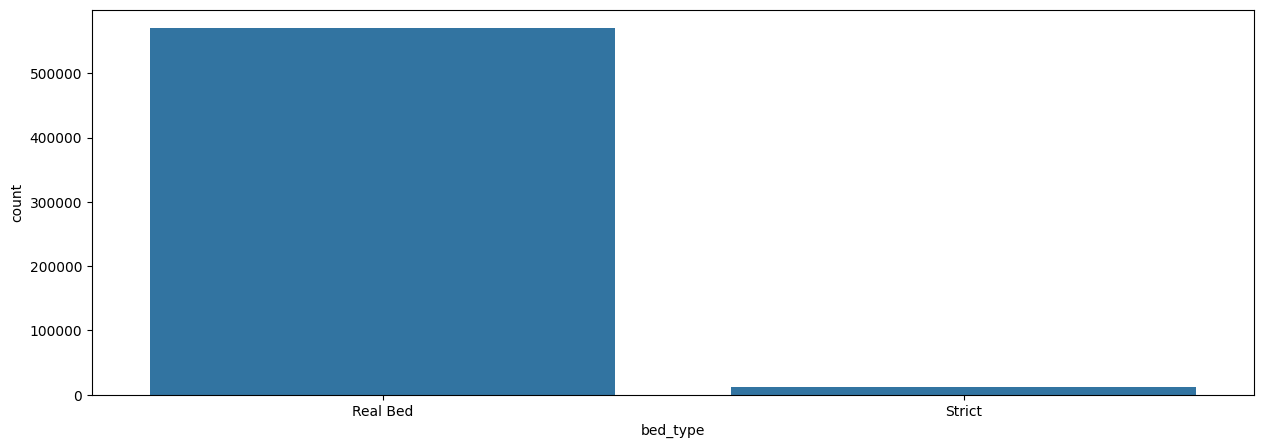

In [36]:
#print(base_airbnb['bed_type'].value_counts())

#plt.figure(figsize=(15, 5))
#grafico = sns.countplot(data=base_airbnb, x='bed_type')
#grafico.tick_params(axis='x', rotation=80)

# Agrupando categorias de bed_type

tabelas_cama = base_airbnb['bed_type'].value_counts()
colunas_agrupar = []

for tipo in tabelas_cama.index:
    if tabelas_cama[tipo] < 10000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['bed_type']==tipo, 'bed_type'] = 'Strict'

print(base_airbnb['bed_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(data=base_airbnb, x='bed_type')
grafico.tick_params(axis='x')

### cancellation_policy

['strict', 'super_strict_60', 'super_strict_30']
cancellation_policy
flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
Strict                           9863
Name: count, dtype: int64


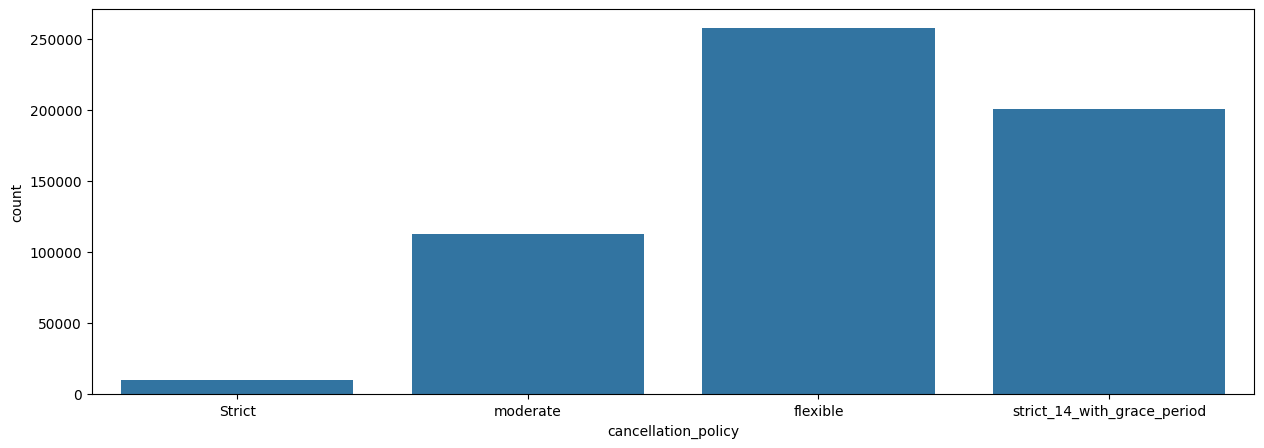

In [37]:
#print(base_airbnb['cancellation_policy'].value_counts())

#plt.figure(figsize=(15, 5))
#grafico = sns.countplot(data=base_airbnb, x='cancellation_policy')
#grafico.tick_params(axis='x', rotation=80)

# Agrupando cateforias de cancellation_pollicy

tabelas_cancellation = base_airbnb['cancellation_policy'].value_counts()
colunas_agrupar = []

for tipo in tabelas_cancellation.index:
    if tabelas_cancellation[tipo] < 10000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['cancellation_policy']==tipo, 'cancellation_policy'] = 'Strict'

print(base_airbnb['cancellation_policy'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(data=base_airbnb, x='cancellation_policy')
grafico.tick_params(axis='x')

In [38]:
tabelas_tipos_cada = base_airbnb['cancellation_policy'].value_counts()
colunas_agrupar = []

for tipo in tabelas_tipos_cada.index:
    if tabelas_tipos_cada[tipo] < 2000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['cancellation_policy']==tipo, 'cancellation_policy'] = 'Outros'

print(base_airbnb['cancellation_policy'].value_counts())

[]
cancellation_policy
flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
Strict                           9863
Name: count, dtype: int64


### amenities

Como temos uma diversidade muito de amenities e, às vezes, as mesmas amenities podem ser escritas de forma diferente, vamos avaliar a quantidade de amenities como o parâmetro para o nosso modelo.

In [39]:
base_airbnb['n_amenities'] = base_airbnb['amenities'].str.split(',').apply(len)

base_airbnb = base_airbnb.drop('amenities', axis=1)
base_airbnb.shape

(581983, 20)

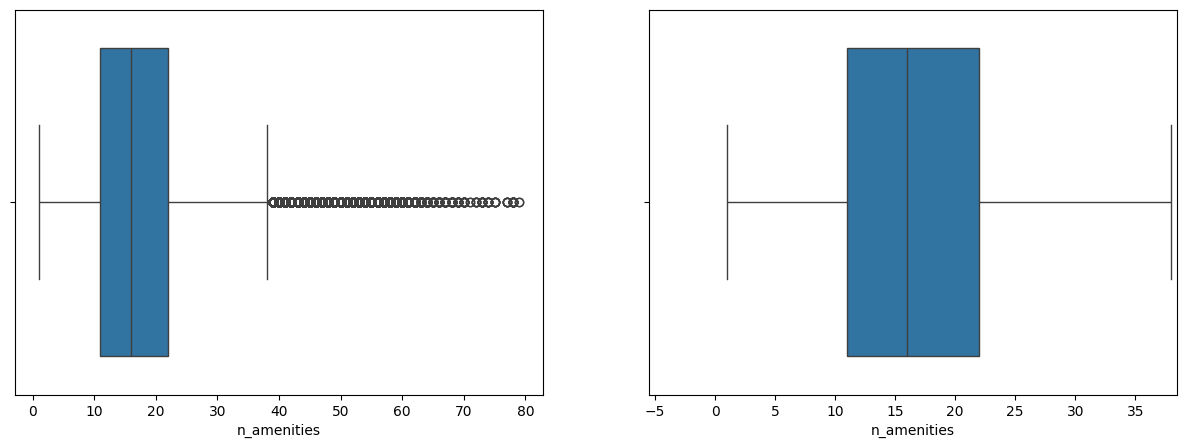

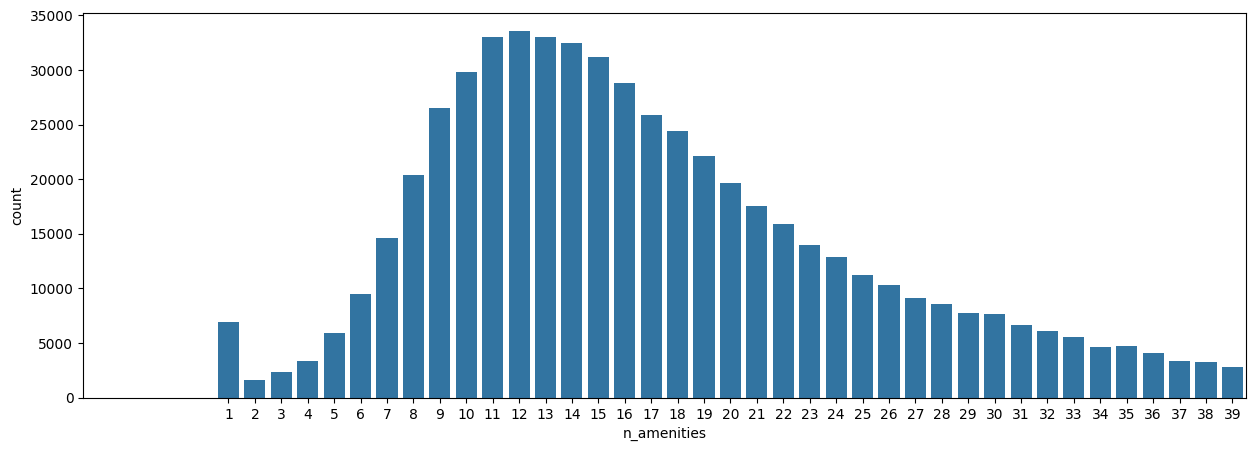

In [40]:
diagrama_caixa(base_airbnb['n_amenities'])
grafico_barra(base_airbnb['n_amenities'])

24343 linhas removidas na coluna de n_amenities


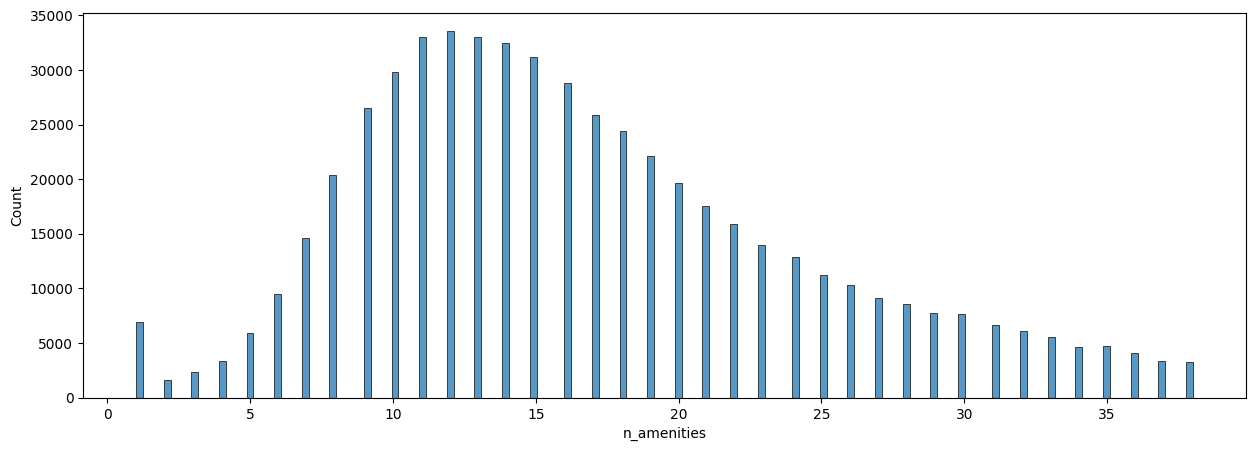

In [41]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'n_amenities')
print('{} linhas removidas na coluna de n_amenities'.format(linhas_removidas))

histograma(base_airbnb['n_amenities'])

### Visualização de Mapa das Propriedades

In [42]:
amostra = base_airbnb.sample(n=50000)
centro_mapa = {'lat':amostra.latitude.mean(), 'lon':amostra.longitude.mean()}
mapa = px.density_map(amostra, lat='latitude', lon='longitude', z='price', radius=2.5,
                        center=centro_mapa, zoom=10,
                        map_style='open-street-map')
mapa.show()

# Encoding
    Ajustar as features para facilitar o trabalho do modelo futuro (features de categoria, true e false, etc.)

    - Features de Valores True ou False, vamos substituir True po 1 e False por 0.
    - Features de Categoria (features em que os valores da coluna são textos) vamos utilizar o método de encoding de variáveis dummies

In [43]:
colunas_TF = ['host_is_superhost', 'instant_bookable', 'is_business_travel_ready']

#print(base_airbnb.columns)
base_airbnb_cod = base_airbnb.copy()
for coluna in colunas_TF:
    base_airbnb_cod.loc[base_airbnb_cod[coluna]=='t', coluna] = 1
    base_airbnb_cod.loc[base_airbnb_cod[coluna]=='f', coluna] = 0
#print(base_airbnb_cod.iloc[0])


In [44]:
colunas_categorias = ['property_type', 'room_type', 'bed_type', 'cancellation_policy']

base_airbnb_cod = pd.get_dummies(data=base_airbnb_cod, columns=colunas_categorias, dtype=int)
display(base_airbnb_cod.head())

,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,extra_people,...,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Real Bed,bed_type_Strict,cancellation_policy_Strict,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period
1,1,2.0,-22.965919,-43.178962,5,1.0,2.0,2.0,270.0,51.0,...,1,0,0,0,1,0,1,0,0,0
3,0,3.0,-22.977117,-43.190454,3,1.0,1.0,2.0,161.0,45.0,...,1,0,0,0,1,0,1,0,0,0
4,1,1.0,-22.983024,-43.214270,3,1.0,1.0,2.0,222.0,68.0,...,1,0,0,0,1,0,1,0,0,0
5,1,1.0,-22.988165,-43.193588,3,1.5,1.0,2.0,308.0,86.0,...,1,0,0,0,1,0,1,0,0,0
6,1,1.0,-22.981269,-43.190457,2,1.0,1.0,2.0,219.0,80.0,...,1,0,0,0,1,0,1,0,0,0


# Modelo de Previsão

- Métricas de Avaliação

In [45]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    RSME = np.sqrt(mean_squared_error(y_teste, previsao))
    return f'Modelo {nome_modelo}:\nR²:{r2:.2%}\nRSME:{RSME:.2f}'


- Escolha dos Modelos a Serem Testados
    1. RandomForrest
    2. LinearRegression
    3. Extra Tree

In [46]:
modelos_rf = RandomForestRegressor()
modelos_lr = LinearRegression()
modelos_et = ExtraTreesRegressor()

modelos = {
    'RandomForest': modelos_rf,
    'LinearRegression': modelos_lr,
    'ExtraTrees': modelos_et,
           }

y = base_airbnb_cod['price']
x = base_airbnb_cod.drop('price', axis=1)

- Separação os dados em treino e teste + Treino do Modelo

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=10)

for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_train, Y_train)
    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(modelo, Y_test, previsao))

Modelo RandomForestRegressor():
R²:97.27%
RSME:43.82
Modelo LinearRegression():
R²:32.70%
RSME:217.54
Modelo ExtraTreesRegressor():
R²:97.49%
RSME:41.98


# Análise do Melhor Modelo

- Modelo Escolhido como Melhor Modelo: ExtraTressRegressor

    Esse foi o modelo com maior valor de R² e ao mesmo tempo o menor valor de RSME. Como não tivemos uma grande diferença de velocidade e de previsão desse modelo como o modelo de RandomForest (que teve resultados próximos de R² e RSME), vamos escolher o modelo ExtraTrees.

    O modelo de regressão linear não obteve um resultado satisfatório, com calores de R² e RSME muito piores do que os outros 2 modelos.

In [48]:
previsao = modelo.predict(X_test)
print(avaliar_modelo(modelos_et, Y_test, previsao))

Modelo ExtraTreesRegressor():
R²:97.49%
RSME:41.98


# Ajustes e Melhorias no Melhor Modelo

,0
bedrooms,0.105783
latitude,0.104108
longitude,0.101248
n_amenities,0.089633
extra_people,0.085467
bathrooms,0.074097
room_type_Entire home/apt,0.073493
accommodates,0.070294
minimum_nights,0.064790
beds,0.053037


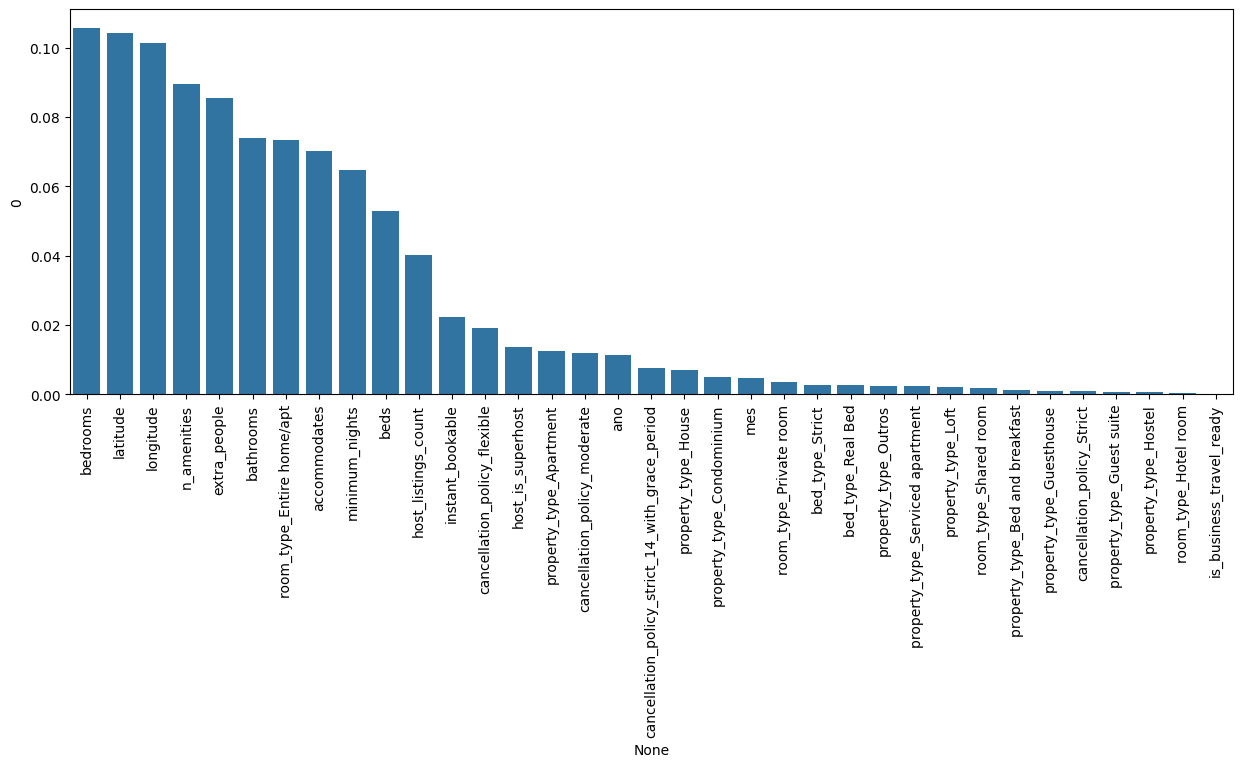

In [49]:
# print(modelos_et.feature_importances_)
# print(X_train.columns)
importancia_features = pd.DataFrame(modelos_et.feature_importances_, X_train.columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)
display(importancia_features)
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features[0])
ax.tick_params(axis='x', rotation=90)

### Ajustes Finais no Modelo

- is_business_travel ready não parece ter muito impacto no nosso modelo. Por isso, para chegar em um modelo mais simples, vamos excluir essa feature e testar o modelo sem ela.

In [50]:
base_airbnb_cod = base_airbnb_cod.drop('is_business_travel_ready', axis=1)

y = base_airbnb_cod['price']
x = base_airbnb_cod.drop('price', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=10)


modelos_et.fit(X_train, Y_train)
previsao = modelos_et.predict(X_test)
print(avaliar_modelo("ExtraTrees", Y_test, previsao))

Modelo ExtraTrees:
R²:97.49%
RSME:42.00


- teste removendo colunas

In [51]:
base_teste = base_airbnb_cod.copy()
for coluna in base_teste:
    if 'bed_type' in coluna:
        base_teste = base_teste.drop(coluna, axis=1)

y = base_teste['price']
x = base_teste.drop('price', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=10)


modelos_et.fit(X_train, Y_train)
previsao = modelos_et.predict(X_test)
print(avaliar_modelo("ExtraTrees", Y_test, previsao))

Modelo ExtraTrees:
R²:97.49%
RSME:42.04


# Deploy do Projeto

In [52]:
x['price'] = y
x.to_csv('dados.csv')

In [53]:
joblib.dump(modelos_et, 'modelo.joblib')

['modelo.joblib']

In [56]:
dados = pd.read_csv("dados.csv")

x_numericos = {'latitude': 0, 'longitude': 0, 'accommodates': 0, 'bathrooms': 0, 'bedrooms': 0, 'beds': 0, 'extra_people': 0,
               'minimum_nights': 0, 'ano': 0, 'mes': 0, 'n_amenities': 0, 'host_listings_count': 0}

x_tf = {'host_is_superhost': 0, 'instant_bookable': 0}

x_listas = {'property_type': ['Apartment', 'Bed and breakfast', 'Condominium', 'Guest suite', 'Guesthouse', 'Hostel', 'House', 'Loft', 'Outros', 'Serviced apartment'],
            'room_type': ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
            'cancellation_policy': ['flexible', 'moderate', 'strict', 'strict_14_with_grace_period']
            }

dicionario = {}
for item in x_listas:
    for valor in x_listas[item]:
        dicionario[f'{item}_{valor}'] = 0

dicionario.update(x_numericos)
dicionario.update(x_tf)
valores_x = pd.DataFrame(dicionario, index=[0])

print(dados.columns)

print(valores_x.columns)

Index(['Unnamed: 0', 'host_is_superhost', 'host_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'extra_people', 'minimum_nights', 'instant_bookable', 'ano', 'mes',
       'n_amenities', 'property_type_Apartment',
       'property_type_Bed and breakfast', 'property_type_Condominium',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Outros', 'property_type_Serviced apartment',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_Strict', 'cancellation_policy_flexible',
       'cancellation_policy_moderate',
       'cancellation_policy_strict_14_with_grace_period', 'price'],
      dtype='object')
Index(['property_type_Apartment', 'property_type_Bed and breakfast',
       'property_type_Condominium', 'property_type_Guest suite',
  